In [23]:
with open("LIAR_test_explain_then_score_gpt-4-0125-preview_temp0.5_calibrated.jsonl") as f:
    data = f.readlines()

In [24]:
import json

In [25]:
data = [json.loads(i) for i in data]

In [26]:
dic1 = {}

In [27]:
for i in data:
    dic1[i["gpt-answer"]] = i['calibrated-uncertainty']


In [41]:
with open("assertivity_prompt_1_results.jsonl") as f:
    results = f.readlines()
results = [json.loads(i) for i in results]

In [42]:
dic2 = {}
for i in results:
    dic2[i[0]["messages"][1]["content"]] = i[1]["choices"][0]["message"]["content"].strip()

In [43]:
asser_uncer_list = []
for k in dic1:
    asser_uncer_list.append((dic1[k], dic2[k]))

In [44]:
asser_uncer_list.sort(key=lambda x: x[0])

In [45]:
asser_uncer_list = [(i*100,int(j)) for i,j in asser_uncer_list]

In [46]:
import matplotlib.pyplot as plt
import numpy as np

In [47]:
len(asser_uncer_list)

1097

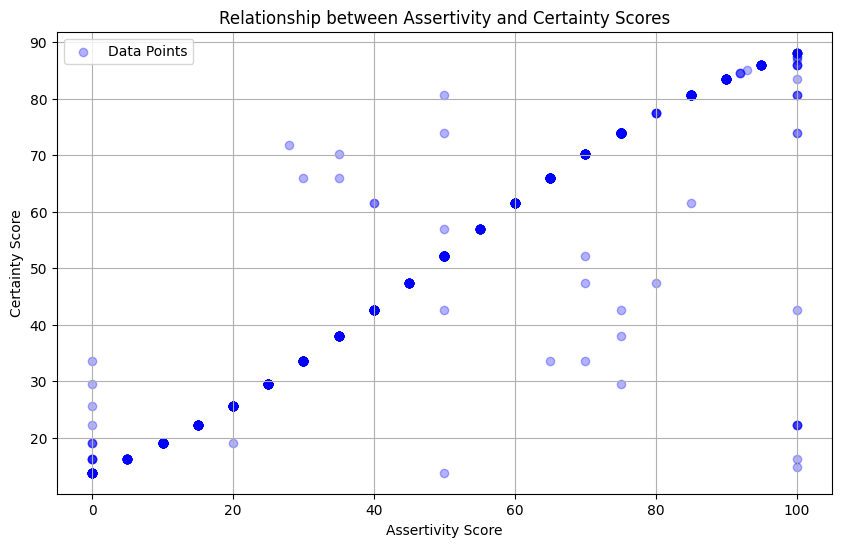

In [51]:
import matplotlib.pyplot as plt

# Example list of tuples (assertivity score, certainty score)
data = asser_uncer_list

# Separate the data into assertivity and certainty scores
assertivity_scores = [x[1] for x in data]
certainty_scores = [x[0] for x in data]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(assertivity_scores, certainty_scores, color='blue', label='Data Points', alpha=0.3)

# Add labels and title
plt.xlabel('Assertivity Score')
plt.ylabel('Certainty Score')
plt.title('Relationship between Assertivity and Certainty Scores')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


1. categorical prompt
    1.

In [50]:
len(assertivity_scores)

1097